<h2>Космический корабль титаник</h2>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Destination - The planet the passenger will be debarking to.

Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

Name - The first and last names of the passenger.

Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [4]:
df.shape

(8693, 14)

In [5]:
df_test.shape

(4277, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
df.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


Значения в поле имени заменим на длину имени

In [8]:
df['Name'] = df['Name'].str.len()
df_test['Name'] = df_test['Name'].str.len()

В поле идентификатора содержется информация о пассажирах, которые покупали билеты вместе - получаем её

In [9]:
df['Group'] = df.PassengerId.apply(lambda x: x.split('_')[0])
groups = df.groupby(['Group'], as_index=False).agg({'PassengerId': 'count'}).rename(columns={'PassengerId':'Together'})
df = df.merge(groups, on='Group').drop(columns=['Group'], axis=1)

df_test['Group'] = df_test.PassengerId.apply(lambda x: x.split('_')[0])
groups = df_test.groupby(['Group'], as_index=False).agg({'PassengerId': 'count'}).rename(columns={'PassengerId':'Together'})
df_test = df_test.merge(groups, on='Group').drop(columns=['Group'], axis=1)

df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Together
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,15.0,False,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,12.0,True,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,13.0,False,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,12.0,False,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,17.0,True,1


In [10]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Together          0
dtype: int64

In [11]:
numerical = df.select_dtypes(exclude = ['object', 'boolean']).columns

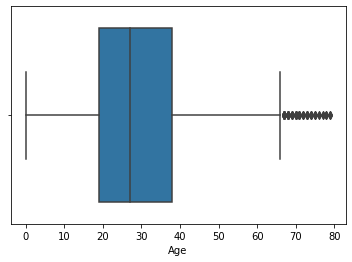

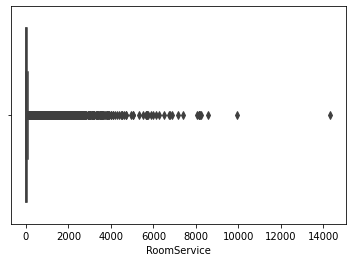

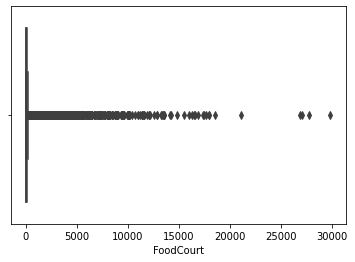

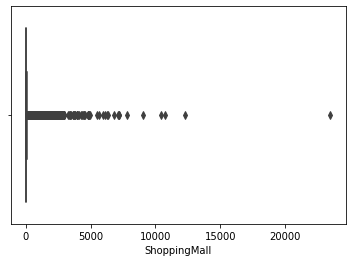

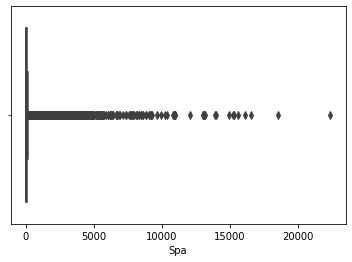

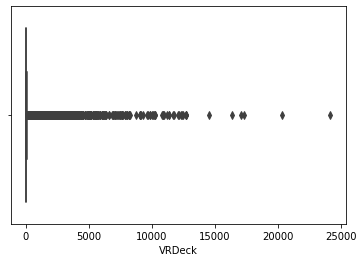

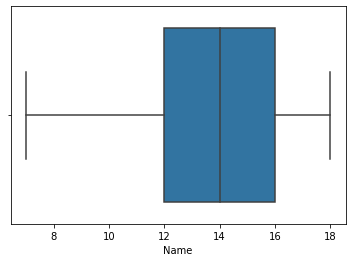

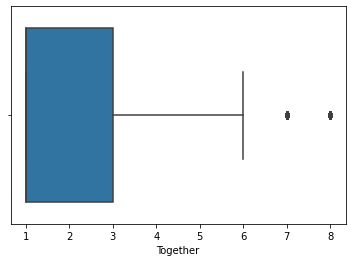

In [12]:
for i in range(len(numerical)):
    plt.figure(i)
    sns.boxplot(x=numerical[i], data=df)

<AxesSubplot:>

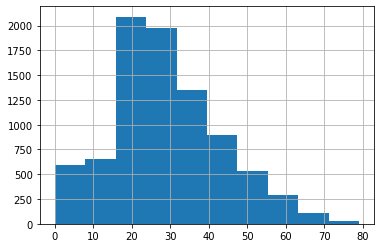

In [13]:
df.Age.hist()

Дла поля возраста пропущенные значения заполним средним значением

In [14]:
df.Age.fillna(df.Age.mean(), inplace=True)
df_test.Age.fillna(df_test.Age.mean(), inplace=True)

Для остальных числовых колонок применим интерполяцию

In [15]:
df[numerical] = df.select_dtypes(include=[np.number]).interpolate()
df_test[numerical] = df_test.select_dtypes(include=[np.number]).interpolate()

In [16]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Together
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,15.0,False,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,12.0,True,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,13.0,False,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,12.0,False,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,17.0,True,1


Удалим поле идентификатора, т.к. оно не несет ценности

In [17]:
df_PassengerId = df['PassengerId']
del df['PassengerId']

passengers = df_test['PassengerId']
del df_test['PassengerId']

In [18]:
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
Transported       0
Together          0
dtype: int64

Получим из названия каюти палубу, номер и сторону

In [19]:
df[['Deck', 'Num','Side']] = df['Cabin'].str.split('/', expand=True)
df = df.drop(['Cabin'],axis=1)

df_test[['Deck', 'Num','Side']] = df_test['Cabin'].str.split('/', expand=True)
df_test = df_test.drop(['Cabin'],axis=1)

df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Together,Deck,Num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,15.0,False,1,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,12.0,True,1,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,13.0,False,2,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,12.0,False,2,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,17.0,True,1,F,1,S


In [20]:
df['Num'].nunique()

1817

Преобразуем поле Num в численный формат

In [21]:
df['Num'] = df['Num'].astype('float')
df_test['Num'] = df_test['Num'].astype('float')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Name          8693 non-null   float64
 11  Transported   8693 non-null   bool   
 12  Together      8693 non-null   int64  
 13  Deck          8494 non-null   object 
 14  Num           8494 non-null   float64
 15  Side          8494 non-null   object 
dtypes: bool(1), float64(8), int64(1), object(6)
memory usage: 1.1+ MB


Посмотрим на категориальные переменные

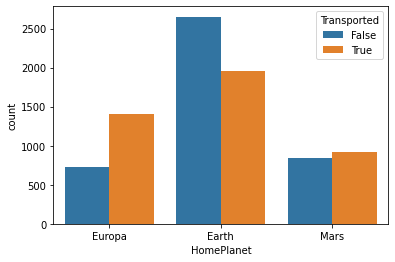

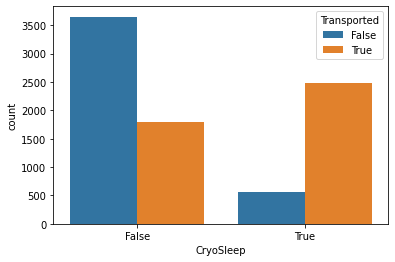

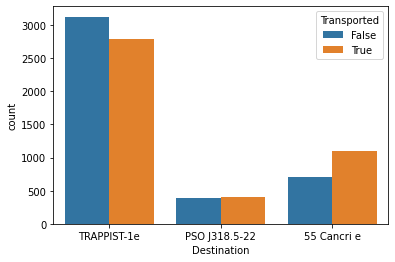

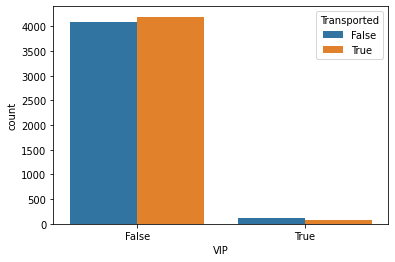

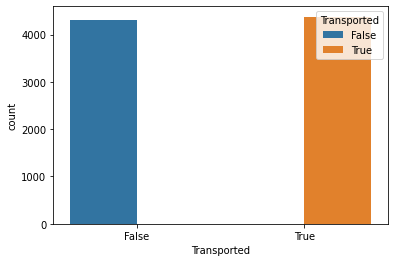

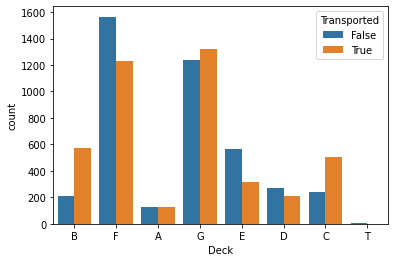

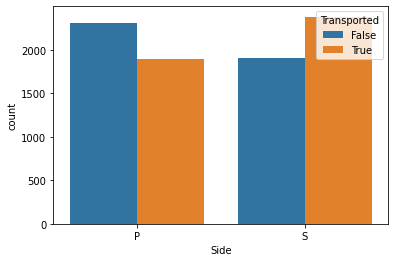

In [23]:
categorical = df.select_dtypes(include = ['object', 'boolean']).columns
for i in range(len(categorical)):
    plt.figure(i)
    sns.countplot(x=categorical[i], data=df, hue='Transported')

In [24]:
df['Deck'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Deck, dtype: int64

Переведем поле палубы в числинные значения для обработки алгоритмом.
То же самое проделаем и с остальными категориальными полями.

In [25]:
df['Deck'] = df['Deck'].replace({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7})

df_test['Deck'] = df_test['Deck'].replace({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7})

df['Deck'].value_counts()

5.0    2794
6.0    2559
4.0     876
1.0     779
2.0     747
3.0     478
0.0     256
7.0       5
Name: Deck, dtype: int64

In [26]:
df['Side'].value_counts()

S    4288
P    4206
Name: Side, dtype: int64

In [27]:
df['Side'] = df['Side'].replace({'S':0, 'P':1})

df_test['Side'] = df_test['Side'].replace({'S':0, 'P':1})

df['Side'].value_counts()

0.0    4288
1.0    4206
Name: Side, dtype: int64

In [28]:
df.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [29]:
df['HomePlanet'] = df['HomePlanet'].replace({'Earth':0,'Europa':1, 'Mars':2})

df_test['HomePlanet'] = df_test['HomePlanet'].replace({'Earth':0,'Europa':1, 'Mars':2})

df['HomePlanet'].value_counts()

0.0    4602
1.0    2131
2.0    1759
Name: HomePlanet, dtype: int64

In [30]:
df.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [31]:
df['Destination'] = df['Destination'].replace({'TRAPPIST-1e':0, '55 Cancri e':1, 'PSO J318.5-22':2})

df_test['Destination'] = df_test['Destination'].replace({'TRAPPIST-1e':0, '55 Cancri e':1, 'PSO J318.5-22':2})

df['Destination'].value_counts()

0.0    5915
1.0    1800
2.0     796
Name: Destination, dtype: int64

In [32]:
df[['CryoSleep', 'VIP','Transported']] = (df[['CryoSleep', 'VIP','Transported']] == True).astype(int)

df_test[['CryoSleep', 'VIP']] = (df_test[['CryoSleep', 'VIP']] == True).astype(int)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   float64
 1   CryoSleep     8693 non-null   int32  
 2   Destination   8511 non-null   float64
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int32  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Name          8693 non-null   float64
 11  Transported   8693 non-null   int32  
 12  Together      8693 non-null   int64  
 13  Deck          8494 non-null   float64
 14  Num           8494 non-null   float64
 15  Side          8494 non-null   float64
dtypes: float64(12), int32(3), int64(1)
memory usage: 1.0 MB


<AxesSubplot:>

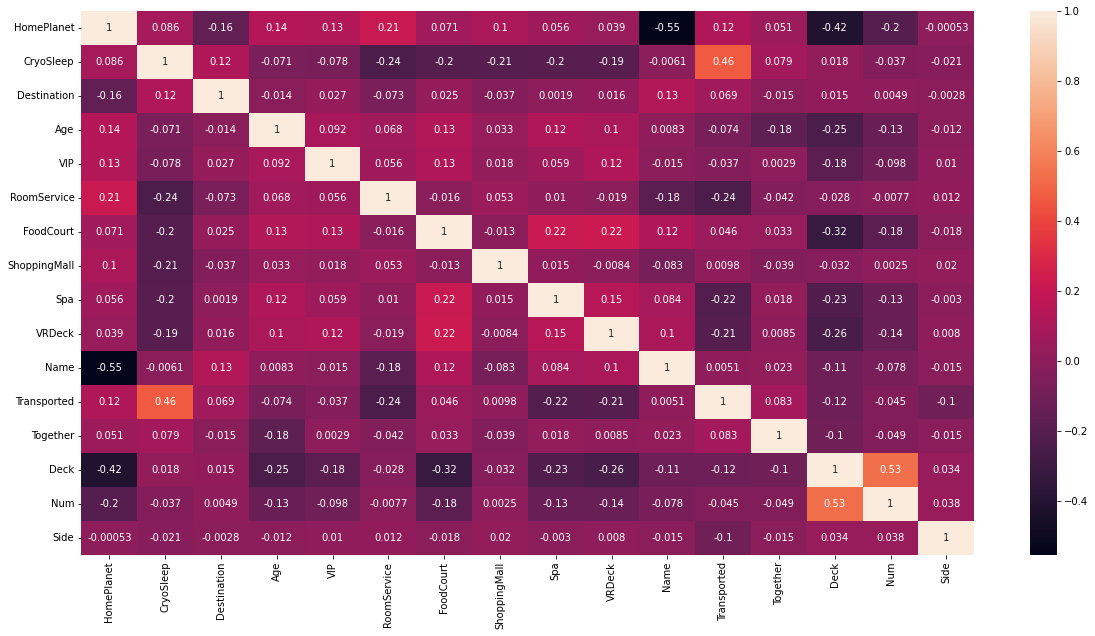

In [34]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)

In [35]:
df.isnull().sum()

HomePlanet      201
CryoSleep         0
Destination     182
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
Transported       0
Together          0
Deck            199
Num             199
Side            199
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   float64
 1   CryoSleep     8693 non-null   int32  
 2   Destination   8511 non-null   float64
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int32  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Name          8693 non-null   float64
 11  Transported   8693 non-null   int32  
 12  Together      8693 non-null   int64  
 13  Deck          8494 non-null   float64
 14  Num           8494 non-null   float64
 15  Side          8494 non-null   float64
dtypes: float64(12), int32(3), int64(1)
memory usage: 1.0 MB


Заполним пропущенные значения

In [37]:
df = df.select_dtypes(include=[np.number]).interpolate().dropna()

df_test = df_test.select_dtypes(include=[np.number]).interpolate().dropna()

In [38]:
df.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
Together        0
Deck            0
Num             0
Side            0
dtype: int64

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier

In [40]:
X = df.drop(columns=['Transported'], axis=1)

In [41]:
y = df.Transported

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [65]:
random_parametrs = { 'n_estimators': range(2, 100),
    'max_depth': range(2, 50), 
    'min_samples_split': range(2, 100), 
    'min_samples_leaf': range(2, 100)}

In [66]:
clf = RandomForestClassifier()

In [67]:
trees = RandomizedSearchCV(clf, random_parametrs, cv=5, n_iter=500, n_jobs=-1)

In [68]:
trees.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=500,
                   n_jobs=-1,
                   param_distributions={'max_depth': range(2, 50),
                                        'min_samples_leaf': range(2, 100),
                                        'min_samples_split': range(2, 100),
                                        'n_estimators': range(2, 100)})

In [69]:
random_forest = trees.best_estimator_
random_forest

RandomForestClassifier(max_depth=21, min_samples_leaf=4, min_samples_split=15,
                       n_estimators=69)

Text(0.5, 0, 'Random Forest Feature Importance')

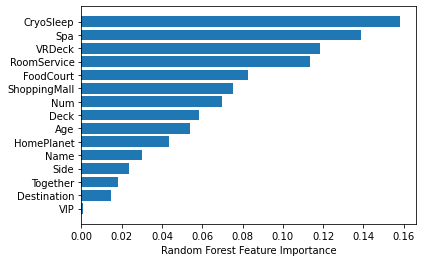

In [70]:
sorted_arg = random_forest.feature_importances_.argsort()
plt.barh(X.columns[sorted_arg], random_forest.feature_importances_[sorted_arg])
plt.xlabel("Random Forest Feature Importance")

In [71]:
random_forest.score(X_train, y_train)

0.8737980769230769

In [72]:
random_forest.score(X_test, y_test)

0.7953990937608924

In [73]:
forest_result = random_forest.predict(df_test)

In [74]:
forest_result = pd.DataFrame({'PassengerId': passengers, 'Transported': forest_result.astype(bool)})

In [75]:
forest_result.to_csv('result_v3.csv', sep=',', index=False)

Your Best Entry!
Your most recent submission scored 0.80173, which is an improvement of your previous score of 0.80102. Great job!